In [2]:
# import modules

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load dataset
df = pd.read_csv('gamelogs_df.csv')

## Data Exploration

In [4]:
# check rows and columns
df.shape

(1610, 31)

In [5]:
# print the first 5 rows
df.head()

,Unnamed: 0,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,0,1,NaN,2023-10-25,23-352,BOS,@,NYK,W (+4),Did Not Play,...,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play
1,1,2,NaN,2023-10-27,23-354,BOS,NaN,MIA,W (+8),Did Not Play,...,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play
2,2,3,1,2023-10-30,23-357,BOS,@,WAS,W (+19),0,...,0,2,1,0,0,1,1,2,1.0,-17
3,3,4,2,2023-11-01,23-359,BOS,NaN,IND,W (+51),0,...,3,3,1,1,0,0,2,11,11.6,+3
4,4,5,NaN,2023-11-04,23-362,BOS,@,BRK,W (+10),Did Not Play,...,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play


In [6]:
# print the datatypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1610 non-null   int64 
 1   Rk          1610 non-null   object
 2   G           1045 non-null   object
 3   Date        1610 non-null   object
 4   Age         1610 non-null   object
 5   Tm          1610 non-null   object
 6   Unnamed: 5  764 non-null    object
 7   Opp         1610 non-null   object
 8   Unnamed: 7  1536 non-null   object
 9   GS          1610 non-null   object
 10  MP          1610 non-null   object
 11  FG          1610 non-null   object
 12  FGA         1610 non-null   object
 13  FG%         1549 non-null   object
 14  3P          1610 non-null   object
 15  3PA         1610 non-null   object
 16  3P%         1412 non-null   object
 17  FT          1610 non-null   object
 18  FTA         1610 non-null   object
 19  FT%         1105 non-null   object
 20  ORB     

In [7]:
# check for missing values
df.isnull().sum()

Unnamed: 0      0
Rk              0
G             565
Date            0
Age             0
Tm              0
Unnamed: 5    846
Opp             0
Unnamed: 7     74
GS              0
MP              0
FG              0
FGA             0
FG%            61
3P              0
3PA             0
3P%           198
FT              0
FTA             0
FT%           505
ORB             0
DRB             0
TRB             0
AST             0
STL             0
BLK             0
TOV             0
PF              0
PTS             0
GmSc            0
+/-             0
dtype: int64

# Data Cleaning

Renaming columns, accounting for null values, dropping unnecessary rows, reassigning datatypes

In [8]:
# create dictionary of mappings
rename = {
    "Unnamed: 0": "index_0", 
    "Rk": "rank", 
    "G": "season_game",
    "Date": "date",
    "Age": "age",
    "Tm": "team",
    "Unnamed: 5": "@",
    "Opp": "opponent",
    "Unnamed: 7": "win_loss_margin",
    "GS": "games_started",
    "MP": "min_played",
    "FG": "field_goals",
    "FGA": "fg_attempts",
    "FG%": "fg%",
    "3P": "3pt_fg",
    "3PA": "3pt_attempts",
    "3P%": "3pt%",
    "FT": "free_throws",
    "FTA": "ft_attempts",
    "FT%": "ft%",
    "ORB": "off_reb",
    "DRB": "def_reb",
    "TRB": "total_reb",
    "AST": "assists",
    "STL": "steals",
    "BLK": "blocks",
    "TOV": "turnovers",
    "PF": "personal_fouls",
    "PTS": "points",
    "GmSc": "game_score",
    "+/-": "plus_minus"
}

# rename columns
df_rename = df.rename(columns=rename)

In [9]:
# drop the selected columns 
selected = ["index_0", "rank", "season_game", "games_started"]
df_drop = df_rename.drop(columns=selected)

In [10]:
# drop rows containing data for inactive players
df_drop = df_drop[df_drop['min_played'] != "Did Not Play"]
df_drop = df_drop[df_drop['min_played'] != "Did Not Dress"]
df_drop = df_drop[df_drop['min_played'] != "Inactive"]

In [11]:
# drop rows containing player data from other teams in instances
# where players were traded or acquired during the season
df_bos = df_drop[df_drop['team'] == "BOS"]

In [12]:
# dropping duplicate column headers
df_clean = df_bos[df_bos['date'] != 'Date']
df_clean = df_bos[df_bos['age'] != 'Age']
df_clean = df_bos[df_bos['team'] != 'Tm']
df_clean = df_bos[df_bos['opponent'] != 'Opp']
df_clean = df_bos[df_bos['min_played'] != 'MP']
df_clean = df_bos[df_bos['field_goals'] != 'FG']
df_clean = df_bos[df_bos['fg_attempts'] != 'FGA']
df_clean = df_bos[df_bos['fg%'] != 'FG%']
df_clean = df_bos[df_bos['3pt_fg'] != '3P']
df_clean = df_bos[df_bos['3pt_attempts'] != '3PA']
df_clean = df_bos[df_bos['3pt%'] != '3P%']
df_clean = df_bos[df_bos['free_throws'] != 'FT']
df_clean = df_bos[df_bos['ft_attempts'] != 'FTA']
df_clean = df_bos[df_bos['ft%'] != 'FT%']
df_clean = df_bos[df_bos['off_reb'] != 'ORB']
df_clean = df_bos[df_bos['def_reb'] != 'DRB']
df_clean = df_bos[df_bos['total_reb'] != 'TRB']
df_clean = df_bos[df_bos['assists'] != 'AST']
df_clean = df_bos[df_bos['steals'] != 'STL']
df_clean = df_bos[df_bos['blocks'] != 'BLK']
df_clean = df_bos[df_bos['turnovers'] != 'TOV']
df_clean = df_bos[df_bos['personal_fouls'] != 'PF']
df_clean = df_bos[df_bos['points'] != 'PTS']
df_clean = df_bos[df_bos['game_score'] != 'GmSc']
df_clean = df_bos[df_bos['plus_minus'] != '+/-']

In [13]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 856 entries, 2 to 1606
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             856 non-null    object
 1   age              856 non-null    object
 2   team             856 non-null    object
 3   @                421 non-null    object
 4   opponent         856 non-null    object
 5   win_loss_margin  856 non-null    object
 6   min_played       856 non-null    object
 7   field_goals      856 non-null    object
 8   fg_attempts      856 non-null    object
 9   fg%              801 non-null    object
 10  3pt_fg           856 non-null    object
 11  3pt_attempts     856 non-null    object
 12  3pt%             683 non-null    object
 13  free_throws      856 non-null    object
 14  ft_attempts      856 non-null    object
 15  ft%              402 non-null    object
 16  off_reb          856 non-null    object
 17  def_reb          856 non-null    o

In [14]:
# convert 'date' to datetime dtype
df_clean['date'] = pd.to_datetime(df_clean['date'])

In [15]:
# add "0:" to the 'min_played' column to account for hours for dtype conversion
df_clean['min_played'] = '0:' + df_clean['min_played']

# convert 'min_played' to timedelta dtype
df_clean['min_played'] = pd.to_timedelta(df_clean['min_played'])

In [16]:
# convert relevant numeric columns to int dtypes
df_clean["field_goals"] = df_clean["field_goals"].astype('int')
df_clean["fg_attempts"] = df_clean["fg_attempts"].astype('int')
df_clean["fg_attempts"] = df_clean["fg_attempts"].astype('int')
df_clean["3pt_fg"] = df_clean["3pt_fg"].astype('int')
df_clean["3pt_attempts"] = df_clean["3pt_attempts"].astype('int')
df_clean["free_throws"] = df_clean["free_throws"].astype('int')
df_clean["ft_attempts"] = df_clean["ft_attempts"].astype('int')
df_clean["off_reb"] = df_clean["off_reb"].astype('int')
df_clean["def_reb"] = df_clean["def_reb"].astype('int')
df_clean["total_reb"] = df_clean["total_reb"].astype('int')
df_clean["assists"] = df_clean["assists"].astype('int')
df_clean["steals"] = df_clean["steals"].astype('int')
df_clean["blocks"] = df_clean["blocks"].astype('int')
df_clean["turnovers"] = df_clean["turnovers"].astype('int')
df_clean["personal_fouls"] = df_clean["personal_fouls"].astype('int')
df_clean["points"] = df_clean["points"].astype('int') 

In [17]:
# convert relevant numeric columns to float dtype
df_clean["fg%"] = df_clean["fg%"].astype('float')
df_clean["3pt%"] = df_clean["3pt%"].astype('float')
df_clean['ft%'] = df_clean['ft%'].astype('float')
df_clean['game_score'] = df_clean['game_score'].astype('float') 

In [18]:
# convert text columns to string dtype
df_clean['team'] = df_clean['team'].astype('string')
df_clean['opponent'] = df_clean['opponent'].astype('string') 

In [19]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 856 entries, 2 to 1606
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   date             856 non-null    datetime64[ns] 
 1   age              856 non-null    object         
 2   team             856 non-null    string         
 3   @                421 non-null    object         
 4   opponent         856 non-null    string         
 5   win_loss_margin  856 non-null    object         
 6   min_played       856 non-null    timedelta64[ns]
 7   field_goals      856 non-null    int64          
 8   fg_attempts      856 non-null    int64          
 9   fg%              801 non-null    float64        
 10  3pt_fg           856 non-null    int64          
 11  3pt_attempts     856 non-null    int64          
 12  3pt%             683 non-null    float64        
 13  free_throws      856 non-null    int64          
 14  ft_attempts      856 non-

## Univariate Analysis
Exploring univariate trends

In [20]:
# print summary statistics of all numeric columns
df_clean.describe()

,min_played,field_goals,fg_attempts,fg%,3pt_fg,3pt_attempts,3pt%,free_throws,ft_attempts,ft%,off_reb,def_reb,total_reb,assists,steals,blocks,turnovers,personal_fouls,points,game_score
count,856,856.000000,856.000000,801.000000,856.000000,856.000000,683.000000,856.000000,856.000000,402.000000,856.000000,856.00000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000
mean,0 days 00:23:09.907710280,4.206776,8.640187,0.492879,1.578271,4.067757,0.378982,1.558411,1.932243,0.800886,1.023364,3.41472,4.438084,2.578271,0.650701,0.628505,1.079439,1.549065,11.550234,9.972430
std,0 days 00:11:24.273304473,3.483361,6.590723,0.239058,1.671486,3.382457,0.273785,2.488119,2.960968,0.260302,1.234747,2.68454,3.115087,2.496022,0.851939,0.982814,1.311487,1.351603,9.611630,8.211107
min,0 days 00:00:04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.100000
25%,0 days 00:14:49.500000,1.000000,3.000000,0.364000,0.000000,1.000000,0.200000,0.000000,0.000000,0.667000,0.000000,1.00000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,3.300000
50%,0 days 00:24:12.500000,3.000000,7.000000,0.500000,1.000000,4.000000,0.375000,0.000000,0.000000,0.900000,1.000000,3.00000,4.000000,2.000000,0.000000,0.000000,1.000000,1.000000,9.000000,8.500000
75%,0 days 00:33:11,6.000000,13.000000,0.615000,3.000000,6.000000,0.500000,2.000000,2.000000,1.000000,2.000000,5.00000,6.000000,4.000000,1.000000,1.000000,2.000000,2.000000,18.000000,15.800000
max,0 days 00:45:14,17.000000,31.000000,1.000000,10.000000,18.000000,1.000000,15.000000,19.000000,1.000000,6.000000,14.00000,15.000000,13.000000,5.000000,6.000000,8.000000,6.000000,45.000000,37.600000


In [ ]:
# create variable of total minutes as a numeric since timedelta dtypecannot be plotted 
df_clean['min_played_minutes'] = df_clean['min_played'].dt.total_seconds()/60

/var/folders/b6/qkbkz5ps5d98w9k68k6khw1c0000gn/T/ipykernel_53637/1731045903.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_clean.hist(ax=axis)


array([[<Axes: title={'center': 'date'}>,
        <Axes: title={'center': 'field_goals'}>,
        <Axes: title={'center': 'fg_attempts'}>,
        <Axes: title={'center': 'fg%'}>,
        <Axes: title={'center': '3pt_fg'}>],
       [<Axes: title={'center': '3pt_attempts'}>,
        <Axes: title={'center': '3pt%'}>,
        <Axes: title={'center': 'free_throws'}>,
        <Axes: title={'center': 'ft_attempts'}>,
        <Axes: title={'center': 'ft%'}>],
       [<Axes: title={'center': 'off_reb'}>,
        <Axes: title={'center': 'def_reb'}>,
        <Axes: title={'center': 'total_reb'}>,
        <Axes: title={'center': 'assists'}>,
        <Axes: title={'center': 'steals'}>],
       [<Axes: title={'center': 'blocks'}>,
        <Axes: title={'center': 'turnovers'}>,
        <Axes: title={'center': 'personal_fouls'}>,
        <Axes: title={'center': 'points'}>,
        <Axes: title={'center': 'game_score'}>],
       [<Axes: title={'center': 'min_played_minutes'}>, <Axes: >,
        <Axes

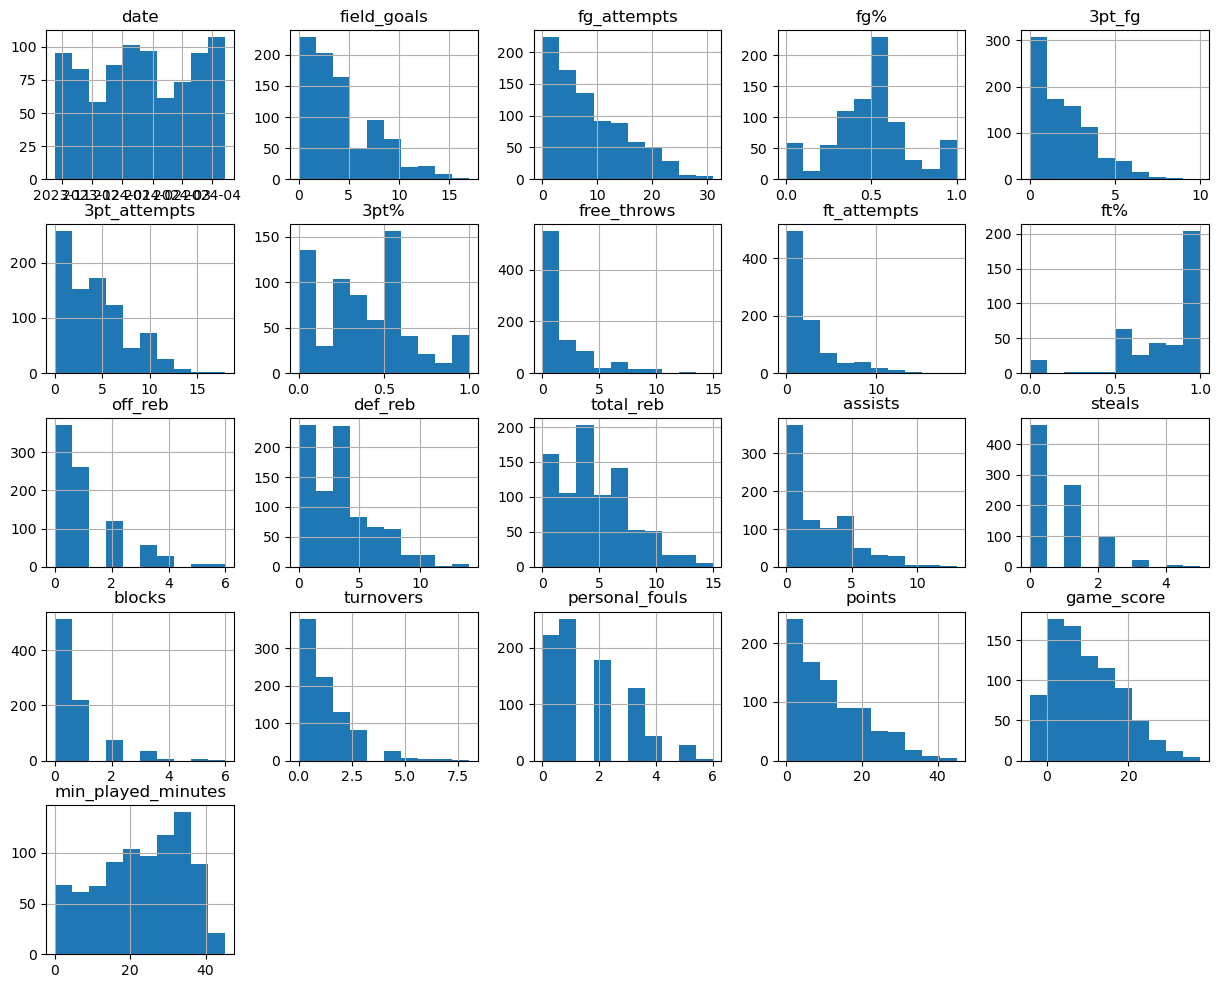

In [27]:
# plot histograms of each column
fig, axis = plt.subplots(figsize=(15, 12))
df_clean.hist(ax=axis)

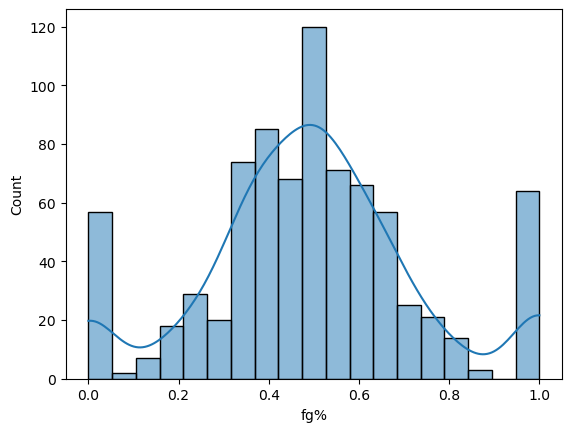

In [53]:
# histogram of "fg%"
sns.histplot(df_clean["fg%"], kde=True)
plt.show()

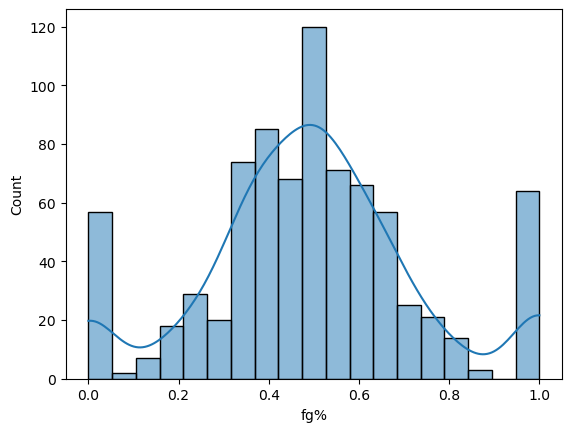

In [52]:
# histogram of "ft%"
sns.histplot(df_clean["ft%"], kde=True)
plt.show()

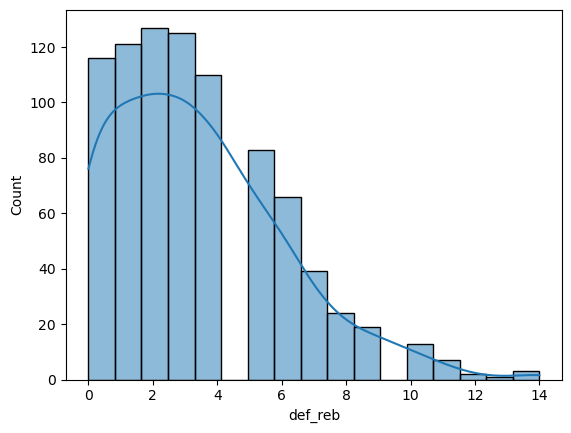

In [42]:
# histogram of "def_reb"
sns.histplot(df_clean["def_reb"], kde=True)
plt.show()

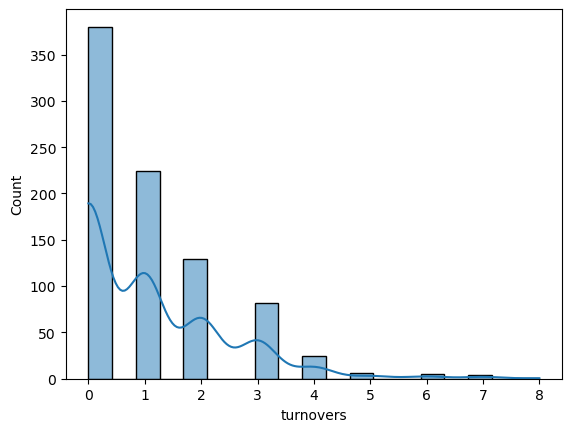

In [43]:
# histogram of "turnovers"
sns.histplot(df_clean["turnovers"], kde=True)
plt.show()

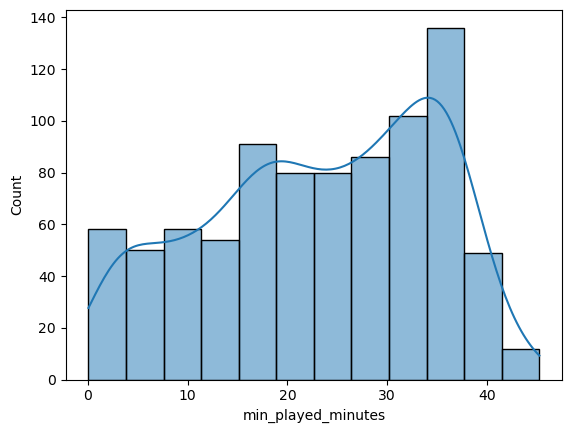

In [44]:
# histogram of "min_played_minutes"
sns.histplot(df_clean["min_played_minutes"], kde=True)
plt.show()

## Bivariate Analysis
Exploring relationships between variables

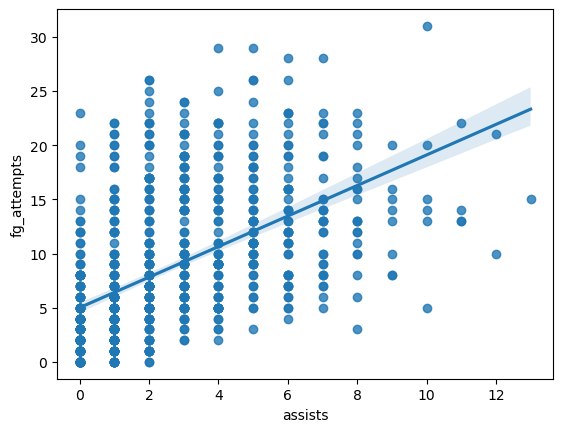

In [45]:
# scatter plot of "assists" and "fg_attempts"
sns.regplot(data=df_clean, x="assists", y="fg_attempts")
plt.show()

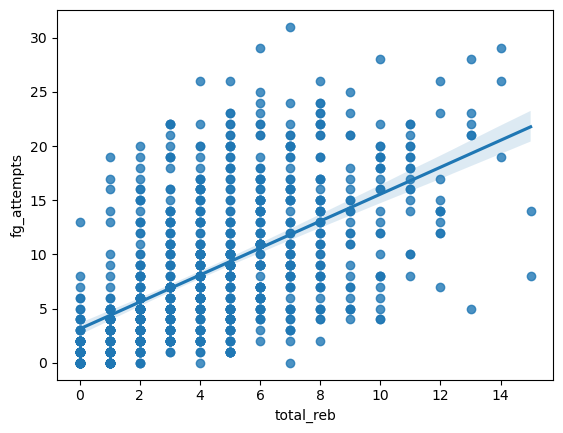

In [46]:
# scatter plot of "total_reb" and "fg_attempts"
sns.regplot(data=df_clean, x="total_reb", y="fg_attempts")
plt.show()

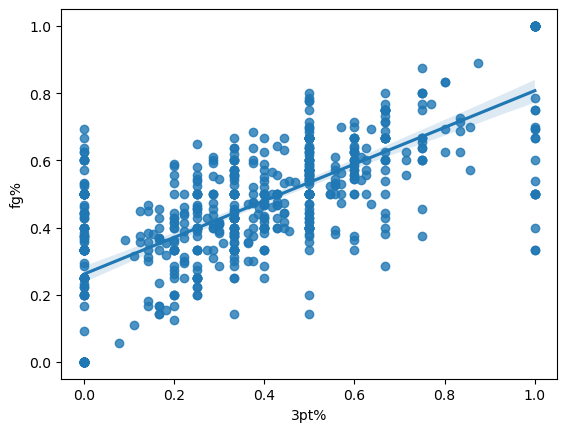

In [47]:
# scatter plot of "3pt%" and "fg%"
sns.regplot(data=df_clean, x="3pt%", y="fg%")
plt.show()

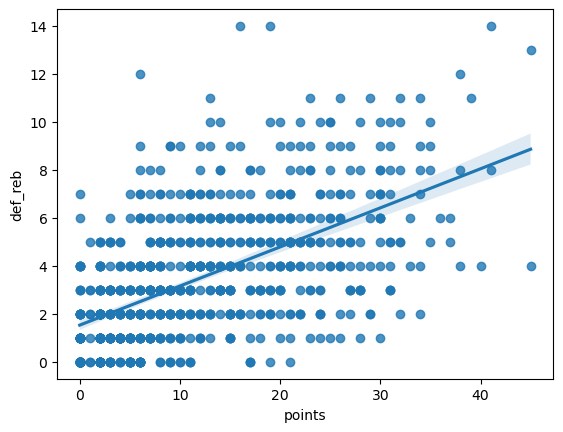

In [48]:
# scatter plot of "points" and "def_reb"
sns.regplot(data=df_clean, x="points", y="def_reb")
plt.show()

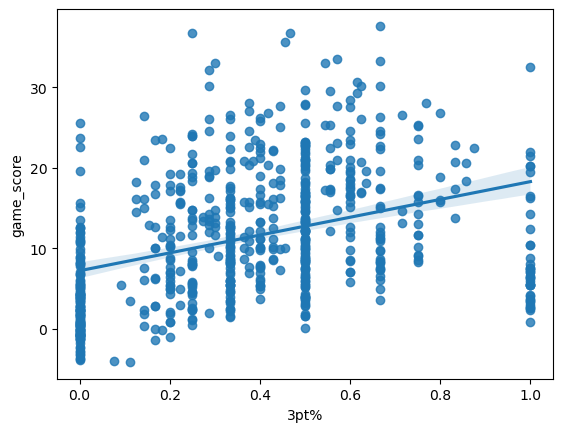

In [49]:
# scatter plot of "3pt%" and "game_score"
sns.regplot(data=df_clean, x="3pt%", y="game_score")
plt.show()

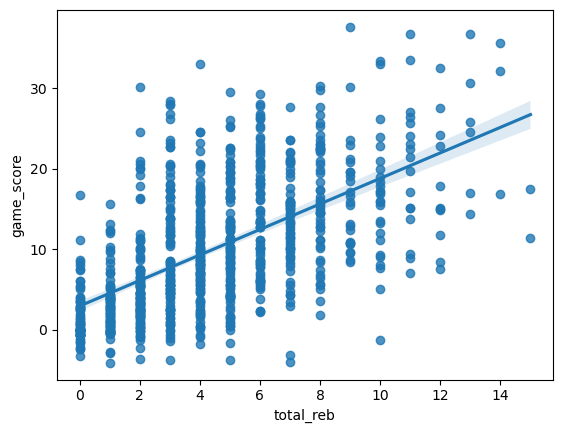

In [50]:
# scatter plot of "total_reb" and "game_score"
sns.regplot(data=df_clean, x="total_reb", y="game_score")
plt.show()

/var/folders/b6/qkbkz5ps5d98w9k68k6khw1c0000gn/T/ipykernel_53637/1077211546.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df_clean.corr(), dtype=bool))
/var/folders/b6/qkbkz5ps5d98w9k68k6khw1c0000gn/T/ipykernel_53637/1077211546.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_clean.corr(), annot=True, mask=mask)


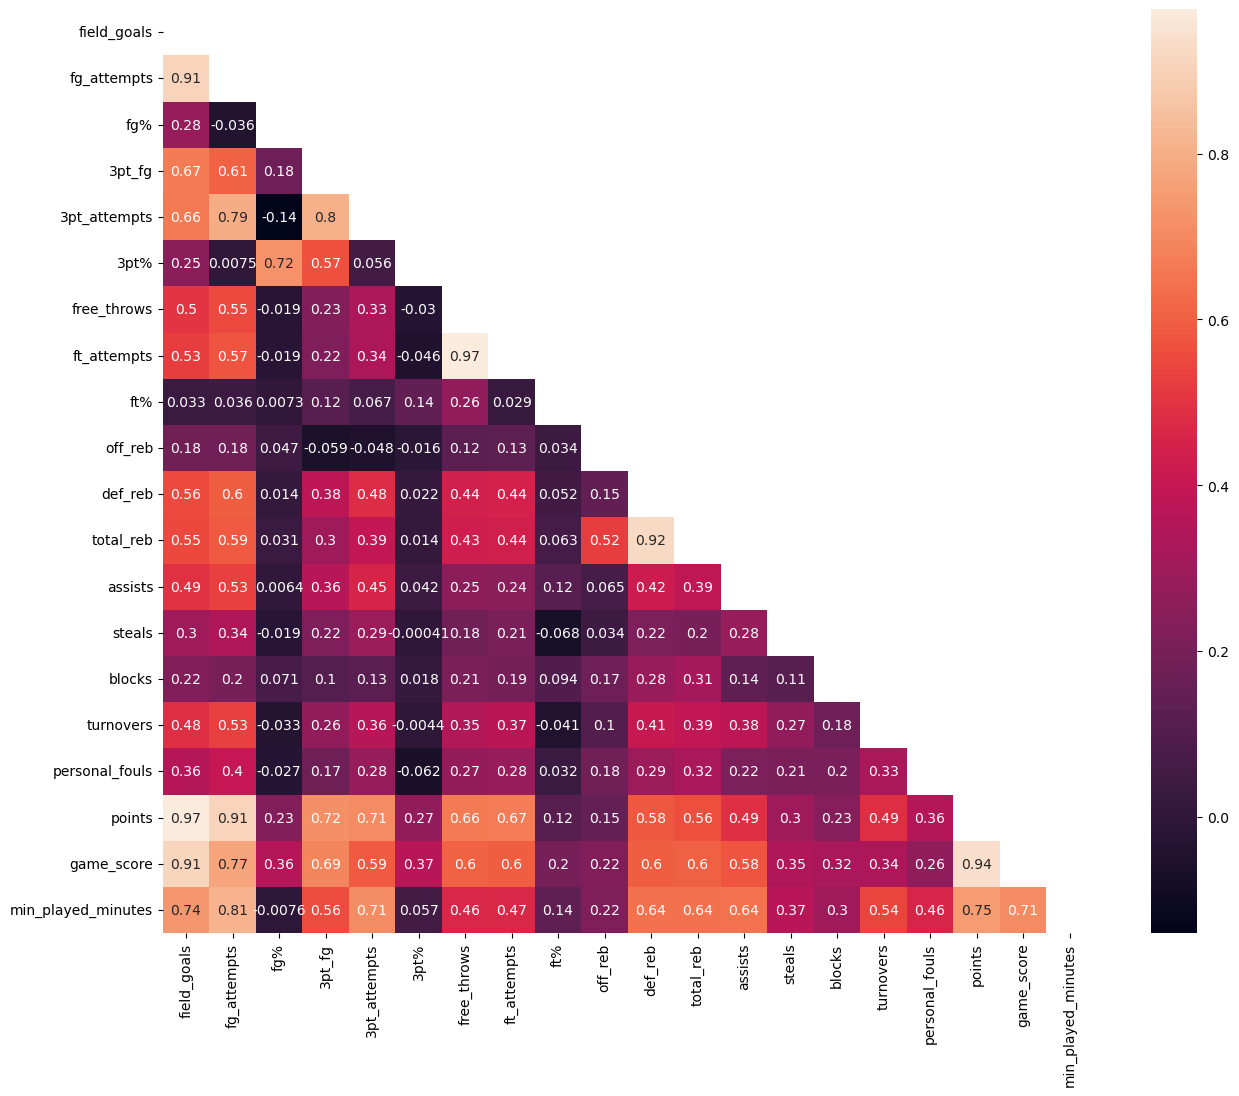

In [28]:
# correlation matrix for remaining variables
mask = np.triu(np.ones_like(df_clean.corr(), dtype=bool))
plt.figure(figsize=(15, 12))
sns.heatmap(df_clean.corr(), annot=True, mask=mask)
plt.show()